# TP 6 Réseaux de neurones - Multi classification et Propagation en arrière
Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 
import sys

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

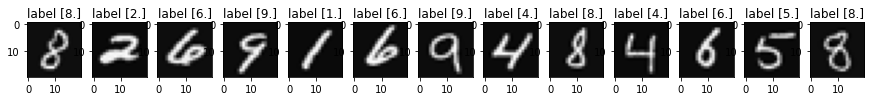

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [6]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [7]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [8]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [9]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [10]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

# Calcul du coût

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [11]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));

In [13]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))
    J= (1/y.shape[0])*(np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3)))))+lambda_/(2*y.shape[0])*(np.sum(np.sum(np.power(theta1[:,1:],2)))+np.sum(np.sum(np.power(theta2[:,1:],2))))

    return J
print(computeCost(X, YY, W1, W2,hidden_layer_size, 500))

58.511686967721644


# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l+1)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [14]:
#à appliquer sur gradientDescent
def NNCostFunction(X, YY, theta1, theta2,hidden_layer_size, lambda_): 
    z2 = np.dot(X, theta1.T) 
    a2 = Sigmoid(z2)
    #print(a2.shape)
    a2 = np.insert(a2, 0, 1, axis=1) #shape de a2 sera (5000,26)
    #print(a2.shape)
    z3 = np.dot(a2, theta2.T) 
    a3 = Sigmoid(z3) 
    Delta1= np.zeros((hidden_layer_size, input_layer_size + 1))#initialiser la matrice delta1 shape(25,401) pour delta de la couche 1
    Delta2= np.zeros((num_labels, hidden_layer_size + 1))#initialiser la matrice delta 2 shape(10,26) pour delta de la couche 2
    #calcul des erreurs backward propagation
    for i in range(X.shape[0]):#pour chaque exemple de la base d'apprentissage faire
        d3 = a3[i] - YY[i]#calcul de d3 qui sera un vecteur de 10 element
        #print(d3)
        d3 = d3.reshape(-1,1) #d3 sera de taille (10,1) aprés cette étape 
        #print(d3)
        s=Sigmoid(z2[i]).dot(1-Sigmoid(z2[i]))
        d2= np.dot(theta2.T[1:,:], d3)*s.reshape(-1,1)
        Delta1=Delta1+ np.dot(d2, X[i].reshape(-1, 1).T)
        Delta2=Delta2+ np.dot(d3, a2[i].reshape(1,-1)) 
    Delta1 = Delta1 / X.shape[0]
    Delta2 = Delta2 / X.shape[0]
    Delta1[:,1:] = Delta1[:,1:] + (lambda_/ X.shape[0]) * theta1[:,1:]
    Delta2[:,1:] = Delta2[:,1:] + (lambda_/ X.shape[0]) * theta2[:,1:]
    J = computeCost(X, YY, theta1, theta2, hidden_layer_size, lambda_)
    return J, [Delta1, Delta2]

# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [15]:
def initialisation_theta():
 
  epsilon_init = 0.18
  theta = [np.random.rand(hidden_layer_size, 1 + input_layer_size ) * (2 * epsilon_init) - epsilon_init,np.random.rand(num_labels, 1 + hidden_layer_size) * (2 * epsilon_init) - epsilon_init]
  return theta 

In [44]:
#iterations = 1000
#alpha = 0.1

In [16]:
iterations = 500
alpha = 1.5
theta = initialisation_theta()
lambda_=0

theta, costs= gradientDescent(X, YY, theta, alpha, iterations, lambda_)

NameError: name 'gradientDescent' is not defined

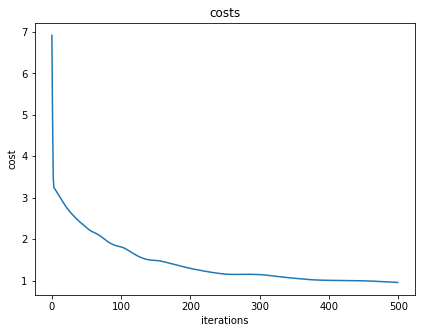

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(costs.shape[0]), costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [17]:
iterations = 200
alpha = 0.5
all_costs=[]
gradients=[]
def gradientDescent1(X, y, theta1, theta2, alpha, iterations):
    i=0
    while(i<iterations):
        print(i)
        derive=NNCostFunction(X, YY, theta1, theta2,hidden_layer_size)
        all_costs.append(derive[0])
        gradients.append((derive[1][0].mean(), derive[1][1].mean()))
        theta1=theta1-alpha*derive[1][0]
        theta2=theta2-alpha*derive[1][1]
        i=i+1
    return theta1, theta2
w11, w22 = gradientDescent(X, YY, W1, W2, alpha, iterations)

NameError: name 'gradientDescent' is not defined

In [ ]:
def plot_cost_gradient(costs, gradients):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("costs")
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.subplot(1, 2, 2)
    plt.title("gradients")
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])
    plt.xlabel('iterations')
    plt.ylabel('gardient')
all_costs=np.asarray(all_costs)
gradients=np.asarray(gradients)
plot_cost_gradient(all_costs, gradients)

# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [ ]:
iterations = 500
alpha = 1.5
lambda_=500
theta = initialisation_theta()
theta_reg, costs= gradientDescent(X, YY, theta, alpha, iterations,lambda_)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(costs.shape[0]), costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [52]:
def predict (W1, W2, X):
    couche1= Sigmoid(np.dot(X, W1.T))
    X0=np.ones((1,X.shape[0]))
    couche2 = np.insert(couche1,0, X0, axis=1) 
    couche2 = Sigmoid(np.dot(couche2 , W2.T))
    y_pred = np.argmax(couche2, axis=1)
    return y_pred

In [57]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)

y_pred = predict (theta[0], theta[1], X)
m=0
for i in range(len(y_pred)):
  if y_pred[i]==y[i]:
    m+=1
precision = m*100/5000
precision

83.98

# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [61]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=0.01, activation='logistic', max_iter=5000,
        hidden_layer_sizes=(25,))
clf.fit(X[:, 1:], YY)
y_pred = np.argmax(clf.predict(X[:, 1:]), axis=1)[:, np.newaxis]
precision = np.mean(y==y_pred)*100
precision

89.8

# Optionnel 2 : Visualisation des poids
    
La visualisation de poids permet de voir quel partie du réseau est activé et pour quelle classe.
Il est possible de visulaiser les paramètres theta1 . 
Ceci peut se faire en utilisant un reshape de ces paramètres afin d'avoir 25 images de taille 20x20 (n'oubliez pas d'ignorer la premuère colonne, celle du biais)

# Optionnel 3 : Renforcement de l'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 29Avril 2022 à 22h


In [ ]:
# bonne chance